# CNN example for classifying MNIST

In [1]:
# import necessary dependencies
%matplotlib notebook

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import keras
from keras.models import Sequential
from keras.layers import *
import numpy as np

Using TensorFlow backend.


In [2]:
# load dataset:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_test_copy = x_test.copy()
y_test_copy = y_test.copy()

<IPython.core.display.Javascript object>


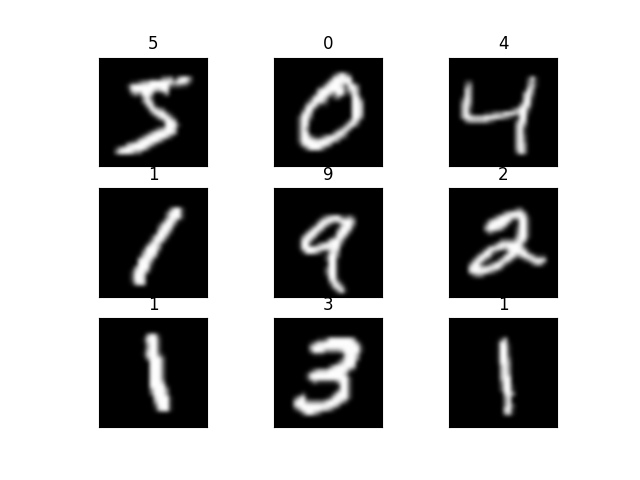

In [3]:
# show example image:
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.title(y_train[i])
    plt.imshow(x_train[i], cmap='gray', interpolation='bicubic')
    plt.xticks([]), plt.yticks([])
plt.show()

<IPython.core.display.Javascript object>


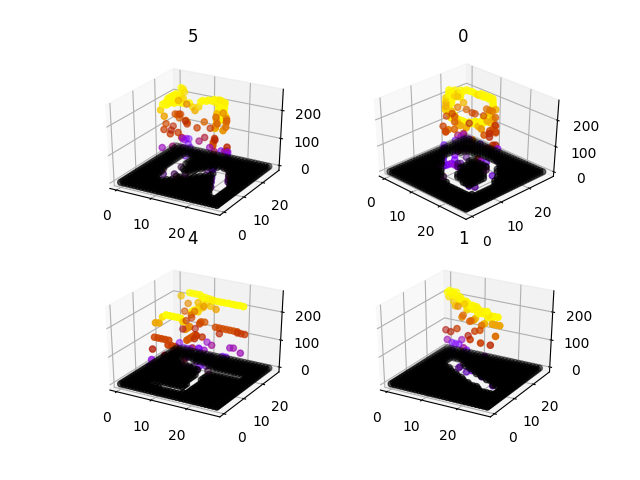

/home/lovelace/.local/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


In [4]:
# show image data before standardization:
stepsize = 1
fig, ax = plt.subplots(2, 2)
for i in range(4):
    plt.subplot(2, 2, i + 1)
    x, y, z = [], [], []
    for y_coord in range(0, 28, stepsize):
        for x_coord in range(0, 28, stepsize):
                x.append(x_coord)
                y.append(y_coord)
                z.append(x_train[i, x_coord, y_coord])
    ax = fig.add_subplot(22 * 10 + i + 1, projection='3d')
    ax.scatter(x, y, z, c=z, cmap='gnuplot')
    plt.title("{}\n".format(y_train[i]))
plt.show()

In [5]:
# standardize data:
mean = np.mean(x_train, axis=0)
std = np.std(x_train, axis=0) + np.ones((28, 28)) * 1e-7

x_train = x_train - mean
x_test = x_test - mean
x_train = x_train / std
x_test = x_test / std

<IPython.core.display.Javascript object>


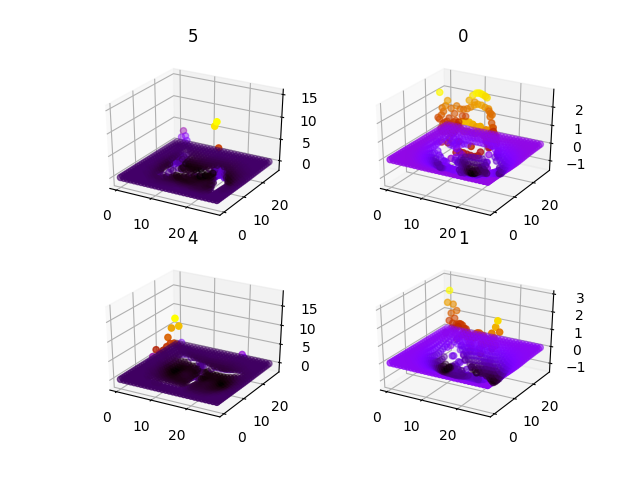

In [6]:
# show image data after standardization:
stepsize = 1
fig, ax = plt.subplots(2, 2)
for i in range(4):
    plt.subplot(2, 2, i + 1)
    x, y, z = [], [], []
    for y_coord in range(0, 28, stepsize):
        for x_coord in range(0, 28, stepsize):
                x.append(x_coord)
                y.append(y_coord)
                z.append(x_train[i, x_coord, y_coord])
    ax = fig.add_subplot(22 * 10 + i + 1, projection='3d')
    ax.scatter(x, y, z, c=z, cmap='gnuplot')
    plt.title("{}\n".format(y_train[i]))
plt.show()

In [7]:
# define cnn:
model = Sequential()
model.add(Conv2D(8, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# compile model:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 8)         80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         584       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 392)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               50304     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
__________

In [9]:
# reshape because of technical reasons:
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

# for learning visualization with tensorboard:
from time import time
from keras.callbacks import TensorBoard
tensorboard = TensorBoard(log_dir="logs/{}".format(time()))

# train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, callbacks=[tensorboard], shuffle=True, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 26s 432us/step - loss: 0.2005 - acc: 0.9391 - val_loss: 0.0880 - val_acc: 0.9722
Epoch 2/10
60000/60000 [==============================] - 26s 426us/step - loss: 0.0736 - acc: 0.9771 - val_loss: 0.0778 - val_acc: 0.9764
Epoch 3/10
60000/60000 [==============================] - 26s 431us/step - loss: 0.0548 - acc: 0.9833 - val_loss: 0.0886 - val_acc: 0.9772
Epoch 4/10
60000/60000 [==============================] - 26s 431us/step - loss: 0.0449 - acc: 0.9859 - val_loss: 0.0517 - val_acc: 0.9855
Epoch 5/10
60000/60000 [==============================] - 26s 426us/step - loss: 0.0366 - acc: 0.9885 - val_loss: 0.0546 - val_acc: 0.9858
Epoch 6/10
60000/60000 [==============================] - 25s 425us/step - loss: 0.0320 - acc: 0.9895 - val_loss: 0.0532 - val_acc: 0.9862
Epoch 7/10
60000/60000 [==============================] - 26s 430us/step - loss: 0.0276 - acc: 0.9914 - val_loss: 0.

In [10]:
# show final metrics and loss on both test and training set:
testing_scores = model.evaluate(x_test, y_test, batch_size=32, verbose=0)
print('\nntesting accuracy:\t', round(testing_scores[1] * 100, 3), '%',
      '\ntesting loss:\t\t', round(testing_scores[0], 3))
training_scores = model.evaluate(x_train, y_train, batch_size=32, verbose=0)
print('\ntraining accuracy:\t', round(training_scores[1] * 100, 3), '%',
      '\ntraining loss:\t\t', round(training_scores[0], 3))


accuracy:	 98.43 % 
testing loss:		 0.073

training accuracy:	 99.295 % 
training loss:		 0.022


<IPython.core.display.Javascript object>


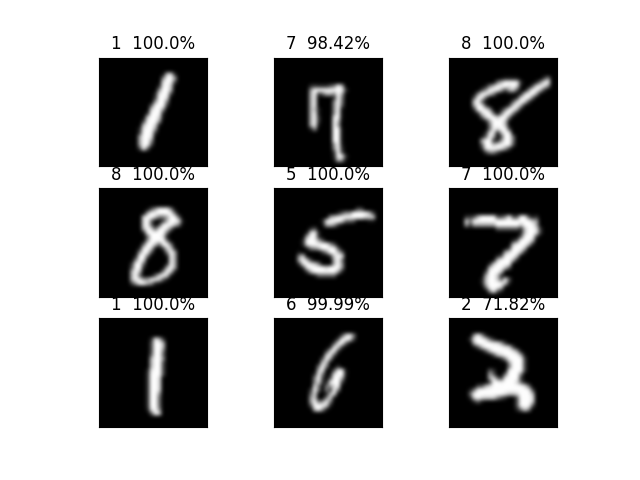

In [11]:
# view some predictions:
testing_indeces = np.random.randint(0, x_test_copy.shape[0], 9)
x_view = x_test[testing_indeces, :]
x_view_original = x_test_copy[testing_indeces, :]
y_view = y_test_copy[testing_indeces]
prediction = model.predict(x_view)
for i in range(3):
    for j in range(3):
        plt.subplot(33 * 10 + (i * 3) + j + 1)
        prediction_row = prediction[(i * 3) + j]
        prediction_row_max = np.max(prediction_row)
        predicted_label = prediction_row.argmax()
        title = str(predicted_label) + '  ' + str(round(prediction_row_max * 100, 2)) + '%'
        plt.title(title)
        plt.imshow(x_view_original[(i * 3) + j], cmap='gray', interpolation='bicubic')
        plt.xticks([]), plt.yticks([])
plt.show()